# Salary prediction in Campus Recruitment

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Placement_Data_Full_Class.csv')


In [3]:
dataset.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [4]:
dataset.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
dataset.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [6]:
cat_binary=['gender','ssc_b','hsc_b','workex','specialisation','status']
cat_multi=['hsc_s','degree_t']

In [7]:
dataset.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [8]:
dataset=dataset.fillna(0)

## Splitting the dataset into the Training set and Test set

In [9]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [10]:
X.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [11]:
y.tail(5)

210    400000.0
211    275000.0
212    295000.0
213    204000.0
214         0.0
Name: salary, dtype: float64

In [12]:
pd.isnull(X).count()

sl_no             215
gender            215
ssc_p             215
ssc_b             215
hsc_p             215
hsc_b             215
hsc_s             215
degree_p          215
degree_t          215
workex            215
etest_p           215
specialisation    215
mba_p             215
status            215
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#X['gender','ssc_b','hsc_b','workex','specialisation','status'] = le.fit_transform(X['gender','ssc_b','hsc_b','workex','specialisation','status'])

for col in cat_binary:
    X[col]=le.fit_transform(X[col])
    

In [14]:
X.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,1,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1
1,2,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,86.5,0,66.28,1
2,3,1,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1
3,4,1,56.00,0,52.00,0,Science,52.00,Sci&Tech,0,66.0,1,59.43,0
4,5,1,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1


In [15]:
from sklearn.compose import ColumnTransformer
#from future_encoders import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder #[1,3,5,6,8,9,11,13]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),cat_multi)], remainder='passthrough')
#ct.fit_transform(X.values)
X = np.array(ct.fit_transform(X))

In [16]:
X

array([[ 0.  ,  1.  ,  0.  , ...,  1.  , 58.8 ,  1.  ],
       [ 0.  ,  0.  ,  1.  , ...,  0.  , 66.28,  1.  ],
       [ 1.  ,  0.  ,  0.  , ...,  0.  , 57.8 ,  1.  ],
       ...,
       [ 0.  ,  1.  ,  0.  , ...,  0.  , 69.72,  1.  ],
       [ 0.  ,  1.  ,  0.  , ...,  1.  , 60.23,  1.  ],
       [ 0.  ,  0.  ,  1.  , ...,  1.  , 60.22,  0.  ]])

In [17]:
print(pd.DataFrame(X).head(5))

    0    1    2    3    4    5    6    7      8    9      10   11     12   13  \
0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  67.00  1.0  91.00  1.0  58.00  0.0   
1  0.0  0.0  1.0  0.0  0.0  1.0  2.0  1.0  79.33  0.0  78.33  1.0  77.48  1.0   
2  1.0  0.0  0.0  1.0  0.0  0.0  3.0  1.0  65.00  0.0  68.00  0.0  64.00  0.0   
3  0.0  0.0  1.0  0.0  0.0  1.0  4.0  1.0  56.00  0.0  52.00  0.0  52.00  0.0   
4  0.0  1.0  0.0  1.0  0.0  0.0  5.0  1.0  85.80  0.0  73.60  0.0  73.30  0.0   

     14   15     16   17  
0  55.0  1.0  58.80  1.0  
1  86.5  0.0  66.28  1.0  
2  75.0  0.0  57.80  1.0  
3  66.0  1.0  59.43  0.0  
4  96.8  0.0  55.50  1.0  


In [18]:
y=y.values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the Multiple Linear Regression model on the Training set

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 38634.69      0.  ]
 [248097.08 320000.  ]
 [273368.23 210000.  ]
 [ -3998.27      0.  ]
 [304442.19 290000.  ]
 [-40338.93      0.  ]
 [267466.58 300000.  ]
 [271692.11 225000.  ]
 [  1517.91      0.  ]
 [341735.39 300000.  ]
 [241078.68 220000.  ]
 [280487.18 400000.  ]
 [342072.74 300000.  ]
 [267828.22 250000.  ]
 [336445.   336000.  ]
 [297869.34 260000.  ]
 [313489.04 210000.  ]
 [-39973.79      0.  ]
 [374907.88 340000.  ]
 [ 16926.6       0.  ]
 [ 17602.26      0.  ]
 [-28968.35      0.  ]
 [298404.07 216000.  ]
 [-11183.61      0.  ]
 [-53713.6       0.  ]
 [-28327.43      0.  ]
 [281471.31 252000.  ]
 [306599.67 200000.  ]
 [293189.01 220000.  ]
 [317058.66 240000.  ]
 [325088.25 252000.  ]
 [-23755.8       0.  ]
 [293539.09 300000.  ]
 [ 12169.93      0.  ]
 [-47139.36      0.  ]
 [303779.84 285000.  ]
 [281853.15 260000.  ]
 [295398.82 250000.  ]
 [271012.09 300000.  ]
 [306547.43 275000.  ]
 [ 56209.26      0.  ]
 [ -6287.65      0.  ]
 [292681.04 220000.  ]]


In [23]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


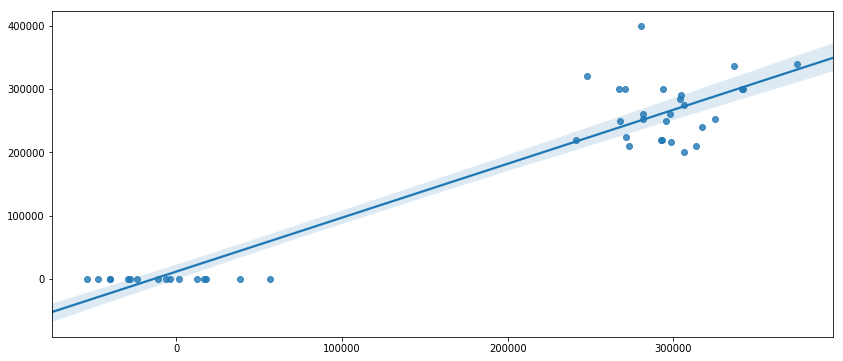

In [24]:
plt.figure(figsize=(14,6))
#sns.lineplot()

sns.regplot(x=y_pred,y=y_test)

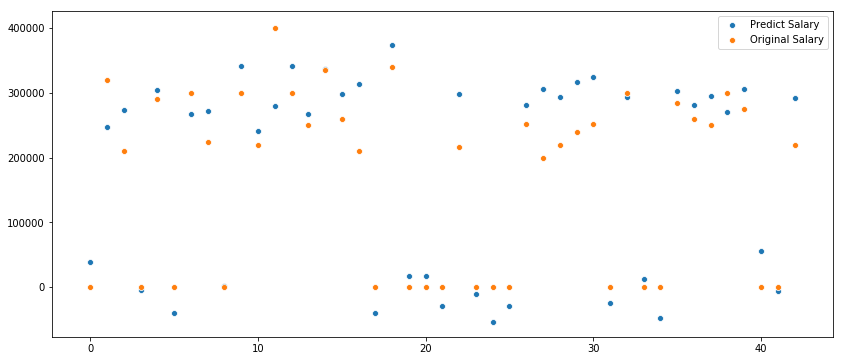

In [29]:
plt.figure(figsize=(14,6))
#sns.lineplot()
index=list(range(0,len(X_test)))
sns.scatterplot(x=index,y=y_pred,label='Predict Salary')
sns.scatterplot(x=index,y=y_test,label='Original Salary')

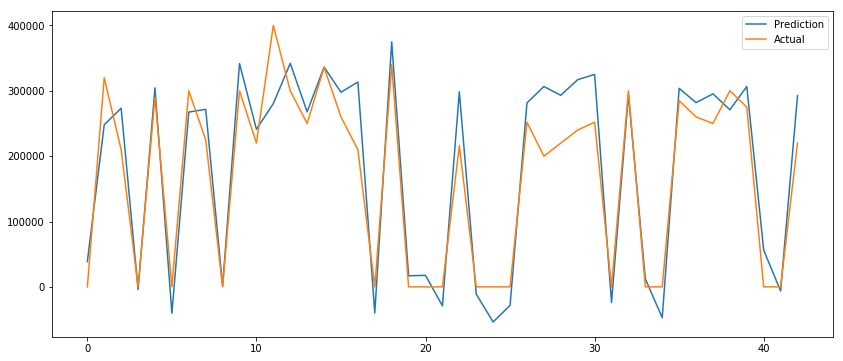

In [30]:
plt.figure(figsize=(14,6))
sns.lineplot(data=y_pred, label="Prediction")
sns.lineplot(data=y_test, label="Actual")

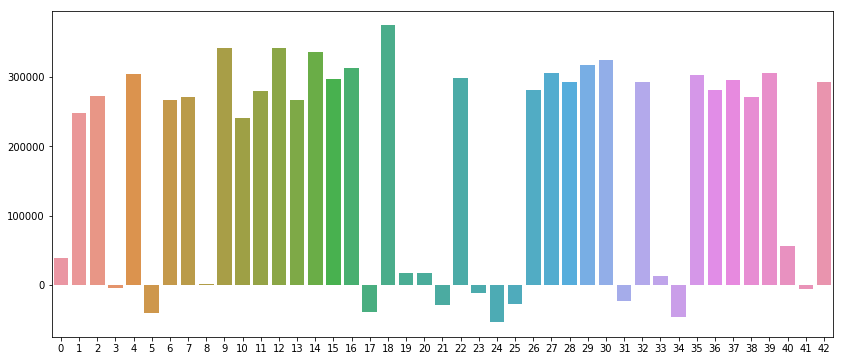

In [31]:
plt.figure(figsize=(14,6))
sns.barplot(x=pd.DataFrame(X_test).index, y=y_pred)

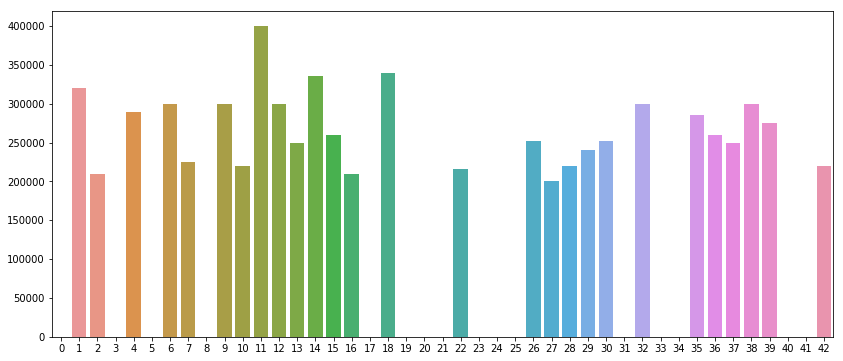

In [32]:
plt.figure(figsize=(14,6))
sns.barplot(x=pd.DataFrame(X_test).index, y=y_test)

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8638497905996252

## Training the Random Forest Regression model on the whole dataset

In [34]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [35]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[     0.      0.]
 [285000. 320000.]
 [282400. 210000.]
 [     0.      0.]
 [293700. 290000.]
 [     0.      0.]
 [219000. 300000.]
 [273400. 225000.]
 [     0.      0.]
 [297600. 300000.]
 [408300. 220000.]
 [278000. 400000.]
 [320100. 300000.]
 [339000. 250000.]
 [401900. 336000.]
 [317500. 260000.]
 [269500. 210000.]
 [     0.      0.]
 [482500. 340000.]
 [     0.      0.]
 [     0.      0.]
 [     0.      0.]
 [285000. 216000.]
 [     0.      0.]
 [     0.      0.]
 [     0.      0.]
 [290500. 252000.]
 [246600. 200000.]
 [248500. 220000.]
 [258500. 240000.]
 [313600. 252000.]
 [     0.      0.]
 [254600. 300000.]
 [     0.      0.]
 [     0.      0.]
 [246600. 285000.]
 [290300. 260000.]
 [331800. 250000.]
 [263600. 300000.]
 [417500. 275000.]
 [     0.      0.]
 [     0.      0.]
 [280000. 220000.]]


In [36]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8012524633874519

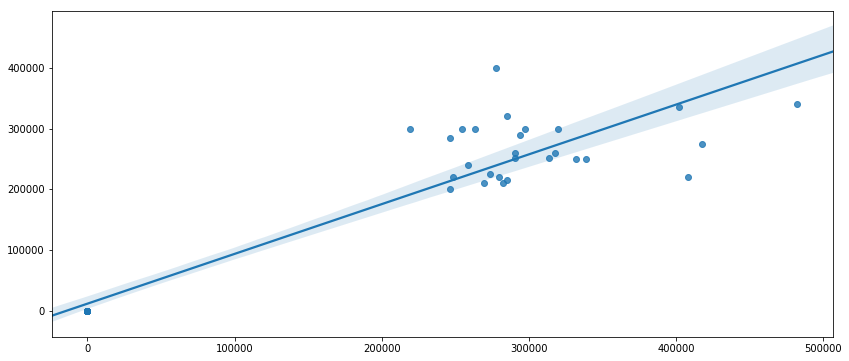

In [37]:
plt.figure(figsize=(14,6))
sns.regplot(x=y_pred,y=y_test)

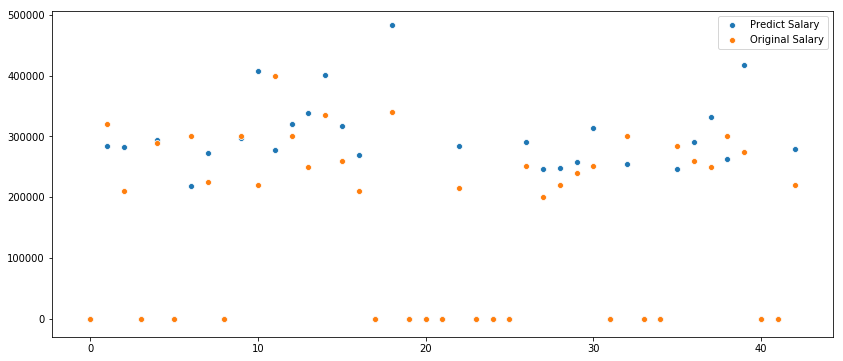

In [40]:
plt.figure(figsize=(14,6))
#sns.lineplot()
#index=list(range(0,len(X_test)))
sns.scatterplot(x=index,y=y_pred,label='Predict Salary')
sns.scatterplot(x=index,y=y_test,label='')

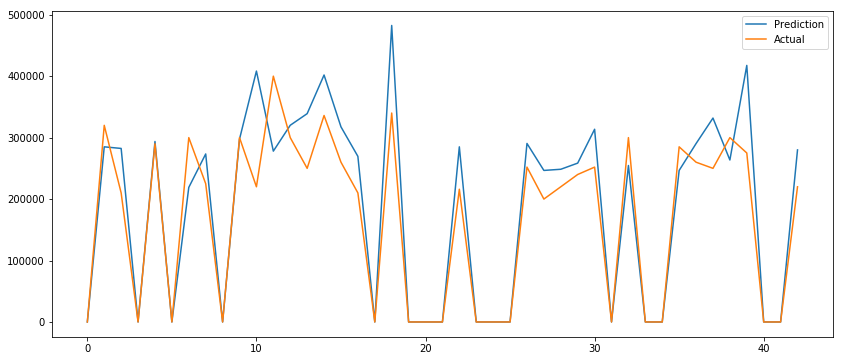

In [41]:
plt.figure(figsize=(14,6))
sns.lineplot(data=y_pred, label="Prediction")
sns.lineplot(data=y_test, label="Actual")

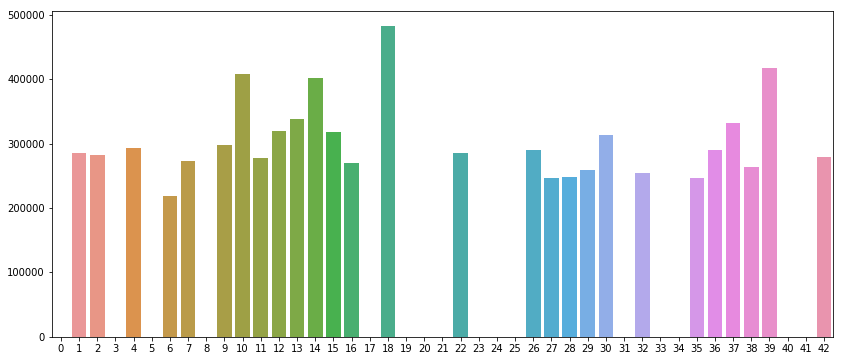

In [42]:
plt.figure(figsize=(14,6))
sns.barplot(x=pd.DataFrame(X_test).index, y=y_pred)


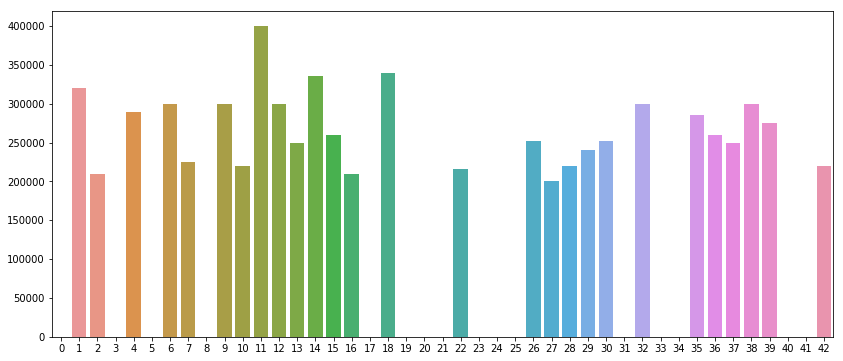

In [44]:
plt.figure(figsize=(14,6))
sns.barplot(x=pd.DataFrame(X_test).index, y=y_test)

### Dataset Source:https://www.kaggle.com/benroshan/factors-affecting-campus-placement